## Importing Needed modules/libraries to be used for our analysis

In [1]:
import pandas as pd
!pip install seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
import json

!pip install scikit-learn
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

     |████████████████████████████████| 292 kB 16.8 MB/s            
     |████████████████████████████████| 15.6 MB 133 kB/s             
     |████████████████████████████████| 22.2 MB 2.0 MB/s             
     |████████████████████████████████| 309 kB 38.9 MB/s            


## Loading our Vivino Dataset for analysis

In [2]:
#load the data  (in CSV) and convert to pandas DataFrame
vivino_data = pd.read_csv("final_vivino_wines_dataset.csv")

#print the first 10 rows of the DataFrame
vivino_data.head(10)

,Winery,Name,Vintage,Region,Country,Rating,Number of Ratings,Wine Type,Price
0,Scarecrow,M. Etain 2018,2018.0,Rutherford,United States,4.8,223,Red,349.99
1,Joseph Phelps Vineyards,Backus Vineyard Cabernet Sauvignon 2013,2013.0,Oakville,United States,4.8,173,Red,495.00
2,Bevan Cellars,Sugarloaf Mountain Vineyard Proprietary Red 2016,2016.0,Napa Valley,United States,4.8,58,Red,340.00
3,Quilceda Creek,Cabernet Sauvignon 2019,2019.0,Columbia Valley,United States,4.8,54,Red,244.99
4,Paul Hobbs,Beckstoffer To Kalon Vineyard Cabernet Sauvign...,2017.0,Oakville,United States,4.8,46,Red,499.99
5,Realm,Houyi Vineyard Red 2015,2015.0,St. Helena,United States,4.8,40,Red,369.00
6,Realm,Cabernet Sauvignon Beckstoffer To Kalon Vineya...,2017.0,Napa Valley,United States,4.8,40,Red,499.00
7,Realm,Cabernet Sauvignon Beckstoffer To Kalon Vineya...,2019.0,Napa Valley,United States,4.8,35,Red,429.99
8,Realm,Houyi Vineyard Red 2016,2016.0,St. Helena,United States,4.8,33,Red,399.00
9,Lail Vineyards,J. Daniel Cuvée Cabernet Sauvignon 2019,2019.0,Napa Valley,United States,4.8,33,Red,299.99


## Data Cleaning

We will examine the data and clean to ensure the data is very well formatted for analysis.

In [3]:
#First, we will prints information about our DataFrame including the index dtype and columns, non-null values and memory usage. 
# this allows us get detailed information about our DataFrame and what best to do

vivino_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Winery             2219 non-null   object 
 1   Name               2219 non-null   object 
 2   Vintage            1755 non-null   float64
 3   Region             2217 non-null   object 
 4   Country            2217 non-null   object 
 5   Rating             2219 non-null   float64
 6   Number of Ratings  2219 non-null   int64  
 7   Wine Type          2219 non-null   object 
 8   Price              2219 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 156.1+ KB


In [4]:
## Check & count NaN values in our DataFrame

vivino_data.isna().sum()

Winery                 0
Name                   0
Vintage              464
Region                 2
Country                2
Rating                 0
Number of Ratings      0
Wine Type              0
Price                  0
dtype: int64

In [5]:
vivino_data.isna().sum().sum()

468

In [6]:
# We will be removing missing or NaN (Not-a-Number) values in the Country & Number of Ratings columns
vivino_data=vivino_data[~(vivino_data['Country'].isna())]
data=vivino_data[vivino_data['Number of Ratings']>= 100].reset_index(drop=True)

In [7]:
# We check again for NaN values in our DataFrame

vivino_data.isna().sum()

Winery                 0
Name                   0
Vintage              462
Region                 0
Country                0
Rating                 0
Number of Ratings      0
Wine Type              0
Price                  0
dtype: int64

In [8]:
vivino_data.head()

,Winery,Name,Vintage,Region,Country,Rating,Number of Ratings,Wine Type,Price
0,Scarecrow,M. Etain 2018,2018.0,Rutherford,United States,4.8,223,Red,349.99
1,Joseph Phelps Vineyards,Backus Vineyard Cabernet Sauvignon 2013,2013.0,Oakville,United States,4.8,173,Red,495.00
2,Bevan Cellars,Sugarloaf Mountain Vineyard Proprietary Red 2016,2016.0,Napa Valley,United States,4.8,58,Red,340.00
3,Quilceda Creek,Cabernet Sauvignon 2019,2019.0,Columbia Valley,United States,4.8,54,Red,244.99
4,Paul Hobbs,Beckstoffer To Kalon Vineyard Cabernet Sauvign...,2017.0,Oakville,United States,4.8,46,Red,499.99


In [9]:
# We check again for NaN values in our DataFrame

vivino_data.isna().sum()

Winery                 0
Name                   0
Vintage              462
Region                 0
Country                0
Rating                 0
Number of Ratings      0
Wine Type              0
Price                  0
dtype: int64

## Data Exploration

This involves analyzing and summarizing Our DataFrame to gain insights, identify patterns, detect anomalies.

### Histogram
We will use histogram to plot visualizations for our DataFrame for more closer look and study

In [10]:
def sub_plots(row, column):
    rows=[]
    cols=[]
    for i in range(row):
        for j in range(column):
            rows.append(i)
            cols.append(j)
    return rows, cols

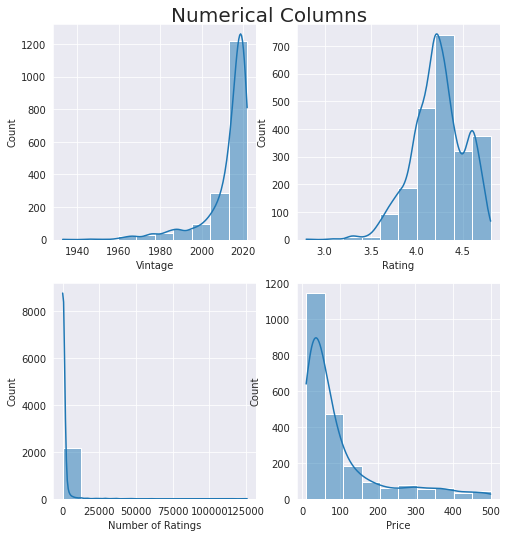

In [11]:
def plot_histograms(dataframe):
    sns.set_style("darkgrid")
    numeric_data = dataframe.select_dtypes(include=np.number)
    column_names = numeric_data.columns
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    rows, cols = sub_plots(2, 2)

    idx = 0
    for col in column_names:
        plot = sns.histplot(numeric_data, x=col, bins=10, kde=True, ax=axes[rows[idx], cols[idx]])
        idx += 1

    fig.subplots_adjust(top=0.95)
    fig.suptitle("Numerical Columns", fontsize=20)

    plt.show()

plot_histograms(vivino_data)

### Heat Map (Scatter Matrix)

To show the correlation between two features in our dataset.

In [ ]:
def display_correlation_heatmap(dataframe):
    numerical_data = dataframe.select_dtypes(include=np.number)
    
    sns.heatmap(numerical_data.corr(), cmap='Purples', annot=True)
    
    plt.title("Correlation Heatmap of Numerical Columns", 
              fontdict={'fontsize': 11, 'fontweight': 'bold', 'horizontalalignment': 'center'})
    
    plt.savefig("Vivino_Scatter_HeatMap.png")
    plt.show()

display_correlation_heatmap(vivino_data)

## Data Visualization

This is to help us put the data into context as well as understand the data exhaustively. We will first create distribution or groups to help look at some figures.

### The Distribution by price

In [ ]:
# Group the data by 'Wine Type' and calculate the median price
wine_type_median_price = vivino_data.groupby('Wine Type')['Price'].median().reset_index()
wine_type_median_price

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wine Type', y='Price', data=vivino_data, order=wine_type_median_price.sort_values(by='Price', ascending=False)['Wine Type'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Boxplot of Median Price by Wine Type")
plt.xlabel("Wine Type")
plt.ylabel("Median Price")

# Display the plot
plt.show()

### The Distribution by Rating

In [ ]:
# Calculate the median rating for each wine type
wine_type_median_rating = vivino_data.groupby('Wine Type')['Rating'].median().reset_index()
wine_type_median_rating

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(data=vivino_data, x='Wine Type', y='Rating', order=wine_type_median_rating['Wine Type'], palette='Set3')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Wine Type vs. Median Rating')
plt.xlabel('Wine Type')
plt.ylabel('Median Rating')
plt.tight_layout()

# Create a legend outside the boxplot
legends = []
for i, wine_type in enumerate(wine_type_median_rating['Wine Type']):
    legends.append(plt.Line2D([0], [0], marker='o', color='w', label=wine_type, 
                              markersize=10, markerfacecolor=sns.color_palette('Set3')[i]))
plt.legend(handles=legends, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

### The Distribution by Number of Ratings

In [ ]:
wine_number_rating=vivino_data.groupby('Wine Type', as_index=False).agg({'Number of Ratings':'mean'}).round(2).sort_values(by=['Number of Ratings'], ascending=False).reset_index(drop=True)
wine_number_rating

In [ ]:
# Create a bar chart

import plotly.express as px
fig = px.bar(
    wine_number_rating,
    x="Wine Type",
    y="Number of Ratings",
    color="Wine Type",
    text=wine_number_rating["Number of Ratings"],
    template='presentation'
)

# Update the layout
fig.update_layout(
    title={
        'text': 'Average Number of Ratings of Each Wine Type',
        'x': 0.5,
        'y': 0.95,
        'font_size': 15
    },
    xaxis={'categoryorder': 'total descending'}
)

# Show the plot in the notebook
fig.show("notebook")

### The Distribution by the most popular wine brands

In [ ]:
the_winery=vivino_data.Winery.value_counts().reset_index(name='Popularity')
the_winery.rename(columns={'index':'Wine Brands'}, inplace=True)
the_winery=the_winery[:20]
the_winery

In [ ]:
# Create a bar chart
import plotly.express as px
fig = px.bar(
    the_winery,
    y="Wine Brands",
    x="Popularity",
    color="Popularity",
    text=the_winery["Popularity"],
    template='plotly_white',
    height=600,
    width=750
)
# Customize the appearance of the chart
fig.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)
# Update the layout
fig.update_layout(
    title={
        'text': 'The Most 20 Popular Wine Brands',
        'x': 0.5,
        'y': 0.95,
        'font_size': 15
    },
    yaxis={'categoryorder': 'total ascending'}
)
# Show the chart in the notebook
fig.show("notebook")

### DIstribution of Countries wines production

In [ ]:
countries_wine_count=vivino_data['Country'].value_counts().reset_index(name='values_count')
countries_wine_count.rename(columns={'index':'Country'}, inplace=True)

countries_wine_count['Country']=countries_wine_count['Country'].apply(lambda x: x.strip())

countries_wine_count.rename(columns={'index':'Country'},inplace=True)

countries_wine_count.insert(1,'Full_Name',countries_wine_count['Country'])

countries_wine_count['Full_Name']=countries_wine_count['Full_Name'].str.replace('United States','United States of America')

In [ ]:
# Loading the countries.geojson file 
import json

In [ ]:
file_path = "countries.geojson"

# Load the geojson file
world_map = json.load(open(file_path, "r"))

In [ ]:
countries_iso={}
country_iso_map={}
world_map['features'][0]['properties']['ADMIN']


for feature in world_map['features']:
    feature['iso']=feature['properties']['ISO_A3']
    countries_iso[feature['properties']['ADMIN']]=feature['iso']
       
country_names=list(countries_wine_count['Full_Name'])
for country in country_names:
    for key in countries_iso.keys():
        if country == key:
            country_iso_map[country]=countries_iso[country]

In [ ]:
countries_wine_count['iso'] = countries_wine_count['Full_Name'].apply(lambda x: country_iso_map.get(x, 'Unknown'))
countries_wine_count

In [ ]:
# fig = px.choropleth(
#     countries_wine_count,
#     locations='iso',
#     locationmode='ISO-3',
#     color='values_count',
#     template='presentation',
#     color_discrete_sequence=px.colors.sequential.Viridis,
#     hover_name='iso',
#     geojson=world_map,
#     basemap_visible=True,
#     title ="Countries that Produce the Most Wine",

# )
# fig.update_traces(
#     text=countries_wine_count['iso'],
#     hovertemplate='%{hovertext}<br>Wine Production: %{z}',
#     customdata=countries_wine_count['values_count']
# )
# fig.savefig("countries DIstribution") 

In [ ]:
vivino_data.head(10)

## Machine Learning

### Building a Recommendation System

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
class WineRecommender:
    
    def __init__(self, dataset):
        self.dataset = dataset
        self.columns_title = ["Rating", "Number of Ratings", "Price"]
        self.pivot_var = ["Rating", "Number of Ratings", "Price"]
    
    def get_pivot(self, column_name="Rating"):
        """
        Args:
        column_name: The name of the column you want to pivot.
                     column_name ={"Rating","Number of Ratings","Price"}, default is "Rating"
                
        Returns:
        A pivoted table (dataframe)
        """
        var_dict = {}
        for i in range(3):
            var_dict[self.pivot_var[i]] = pd.pivot_table(vivino_data, index=['Winery', 'Name'], values=[self.columns_title[i]], columns='Wine Type')
            var_dict[self.pivot_var[i]].columns = ['Dessert', 'Fortified', 'Red', 'Rose', 'Sparkling', 'White']
            var_dict[self.pivot_var[i]] = var_dict[self.pivot_var[i]].fillna(0)
        
        if column_name == "Number of Ratings":
            return var_dict["Number of Ratings"]
        elif column_name == "Price":
            return var_dict["Price"]
        else:
            return var_dict["Rating"]

    def get_indices(self, suggestions, pivot_table):
        idx = 0
        sim = []
        wineries = []
        wine_names = []
        for i in suggestions[0]:
            sim.append(pivot_table.index[i])
            wineries.append(sim[idx][0])
            wine_names.append(sim[idx][1])
            idx += 1

        indices = []
        for index in range(len(wine_names)):
            ind = np.where((vivino_data['Winery'] == wineries[index]) & (vivino_data['Name'] == wine_names[index]))
            indices.append(ind[0][0])
        
        return indices

    def recommend(self, winery=None, name=None, pos=None, recommend_by="Rating", method="KNeighbors", algorithm="brute", n_neighbors=11, sim_elem=11):
        """
        Args:
        winery: The name of the winery, if method = "Similarity"
        name: The name of the wine, if method = "Similarity"
        pos: The index position of the wine, if method= "KNeighbors"
        recommend_by: The method used for recommendation. must be a column in the dataframe.
        method: The algorithm used for recommendation. options={"KNeighbors","Similarity"}
        algorithm: The algorithm used in the recommendation method. options={"auto","ball_tree","brute"}. default is "brute"
        n_neighbors: The number of neighbors to use in the KNeighbors algorithm. default 10.
        sim_elem: The number of similar wines to return in the Similarity algorithm. default 10.

        Returns:
        A dataframe of recommended wines
        """

        if method == "KNeighbors":
            pivot_table = self.get_pivot(column_name=recommend_by)  # Get the pivot_table of the dataframe
            pivot_table_sparse = csr_matrix(pivot_table)  # Convert the dense matrix to a sparse matrix
            rec_model = NearestNeighbors(algorithm=algorithm)
            rec_model.fit(pivot_table_sparse)

            if pos is not None and pos < len(pivot_table):
                distance, sugg = rec_model.kneighbors(pivot_table.iloc[pos, :].values.reshape(1, -1), n_neighbors=n_neighbors)
                indices = self.get_indices(sugg, pivot_table)

                if indices:
                    if indices[0] < len(self.dataset):
                        recommended_wine = self.dataset.loc[indices[0]]
                        print(f"Showing Recommendations for \n")
                        print(recommended_wine)
                        return recommended_wine
                    else:
                        print("No valid recommendation found.")
                else:
                    print("No valid recommendation found.")
            else:
                print("Invalid position provided for recommendation.")

        
        if method == "Similarity":
            df = vivino_data.copy()
            scaler = StandardScaler()
            features = scaler.fit_transform(df[self.columns_title])
            similarity = cosine_similarity(features)
            
            if winery is not None and name is not None:
                index = df[(df['Winery'].str.contains(winery)) & (df['Name'].str.contains(name))].index
                if len(index) > 0:
                    index = index[0]
                    
                    print("Showing Recommendations for \n")
                    print(vivino_data.loc[index])
                    
                    wines_list = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])[1:sim_elem]
                    
                    indexes = []
                    for wine in wines_list:
                        indexes.append(wine[0])
                    
                    return vivino_data.loc[indexes]
                else:
                    print("Winery and/or wine name not found in the dataset.")

## Model Testing

In [ ]:
# initializing the class

wr=WineRecommender(vivino_data)

### Testing the "KNeighbors" algorithm

In [ ]:
KNeighbors=wr.recommend(pos=500, recommend_by="price", method="KNeighbors")
KNeighbors

### Testing the "Similarity" algorithm

In [ ]:
similarity_algo = wr.recommend(winery = "La Ferme Rouge" ,name="Le Gris 2021", method="Similarity")
similarity_algo